# Objective : To Predict Loan application status.

In this task we need to predict loan application status of an applicant on the basis of other columns like Gender, Married, etc.

* Target variable for this dataset is Loan_status.

#### Import various libraries necessary for this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('./Downloads/loan_prediction.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Now we need to check dimensions, description and pressence of null values in dataset.

In [4]:
loan.shape

(614, 13)

In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above we can conclude this about dataset : 

* dataset contains 614 rows & 13 columns
* description of the dataset gives mean, max value, min value, etc of every column of dataset which contains continuous data.
* There is pressence of null values in the dataset.

#### Now checking the data type of the every column of the dataset before the EDA.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### EDA

1. Loan_ID

In [8]:
loan['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [9]:
ab = []
for i in loan['Loan_ID']:
    i = i[-4:]
    ab.append(i)

In [10]:
loan['Loan_ID'] = pd.Series(ab)

In [11]:
loan['Loan_ID'].unique()

array(['1002', '1003', '1005', '1006', '1008', '1011', '1013', '1014',
       '1018', '1020', '1024', '1027', '1028', '1029', '1030', '1032',
       '1034', '1036', '1038', '1041', '1043', '1046', '1047', '1050',
       '1052', '1066', '1068', '1073', '1086', '1087', '1091', '1095',
       '1097', '1098', '1100', '1106', '1109', '1112', '1114', '1116',
       '1119', '1120', '1123', '1131', '1136', '1137', '1138', '1144',
       '1146', '1151', '1155', '1157', '1164', '1179', '1186', '1194',
       '1195', '1197', '1198', '1199', '1205', '1206', '1207', '1213',
       '1222', '1225', '1228', '1233', '1238', '1241', '1243', '1245',
       '1248', '1250', '1253', '1255', '1256', '1259', '1263', '1264',
       '1265', '1266', '1267', '1273', '1275', '1279', '1280', '1282',
       '1289', '1310', '1316', '1318', '1319', '1322', '1325', '1326',
       '1327', '1333', '1334', '1343', '1345', '1349', '1350', '1356',
       '1357', '1367', '1369', '1370', '1379', '1384', '1385', '1387',
      

In [13]:
loan['Loan_ID'] = pd.to_numeric(loan['Loan_ID'])

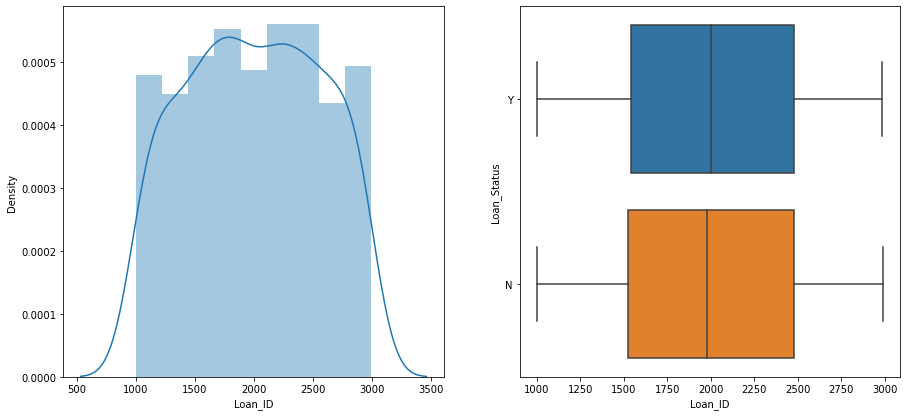

In [14]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(loan['Loan_ID'])
plt.xlabel('Loan_ID')
plt.subplot(222)
sns.boxplot(x= 'Loan_ID', y= 'Loan_Status', data= loan)
plt.xlabel('Loan_ID')
plt.ylabel('Loan_Status')
plt.show()

By looking at both the graphs of Loan_ID we can cocnlude that we cannot determine the skewness of data and data is giving highest density around 2300 from distplot and from boxplot we conclude that there is no outliers of Loan_ID present in Loan_Status.

2. Gender

In [15]:
loan['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

filling the null values randomly so that data do not create bias.

In [16]:
loan['Gender'].fillna(method= 'bfill', inplace= True)

In [17]:
loan['Gender'].isnull().sum()

0

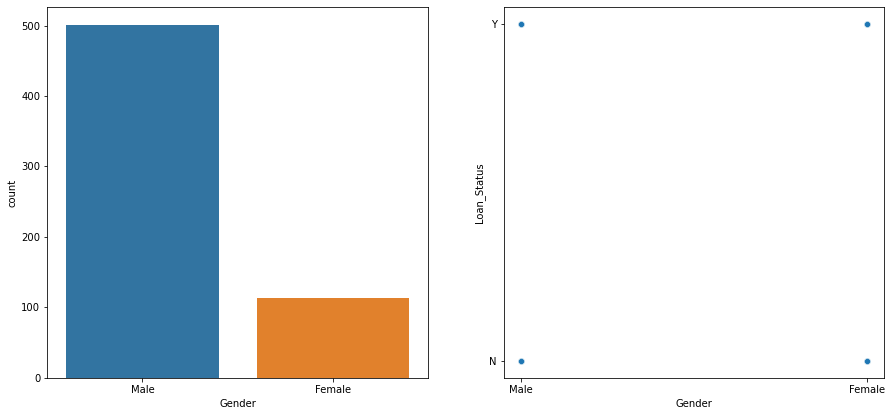

In [18]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Gender'])
plt.xlabel('Gender')
plt.subplot(222)
sns.scatterplot(x= 'Gender', y= 'Loan_Status', data= loan)
plt.xlabel('Gender')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Gender we can conclude that most applicants are male from countplot and from scatterplot we conclude that both type of Gender are present in both categories of Loan_Status.

3. Married

In [19]:
loan['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

filling null values randomly to not to create bias.

In [20]:
loan['Married'].fillna(method= 'bfill', inplace= True)

In [21]:
loan['Married'].isnull().sum()

0

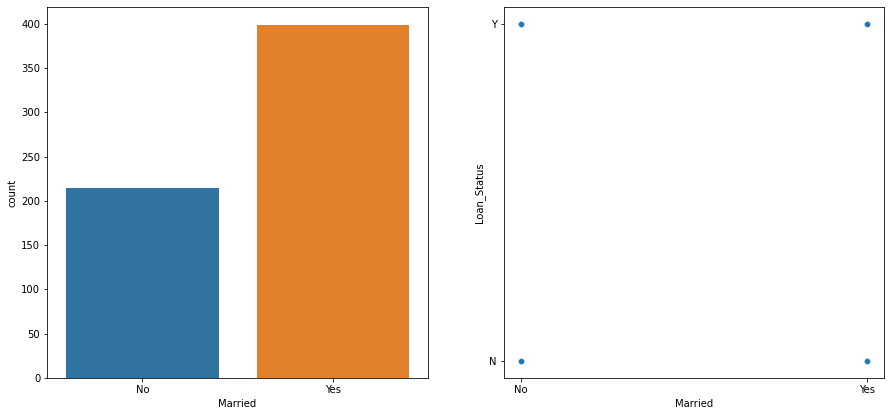

In [22]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Married'])
plt.xlabel('Married')
plt.subplot(222)
sns.scatterplot(x= 'Married', y= 'Loan_Status', data= loan)
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Married we conclude that most people applying for loan are married from countplot and from scatterplot we conclude that both type of people are present in both categories of loan_status.

4. Dependents

In [23]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

filling null values randomly to not to create bias

In [24]:
loan['Dependents'].fillna(method= 'bfill', inplace= True)

In [25]:
loan['Dependents'].isnull().sum()

0

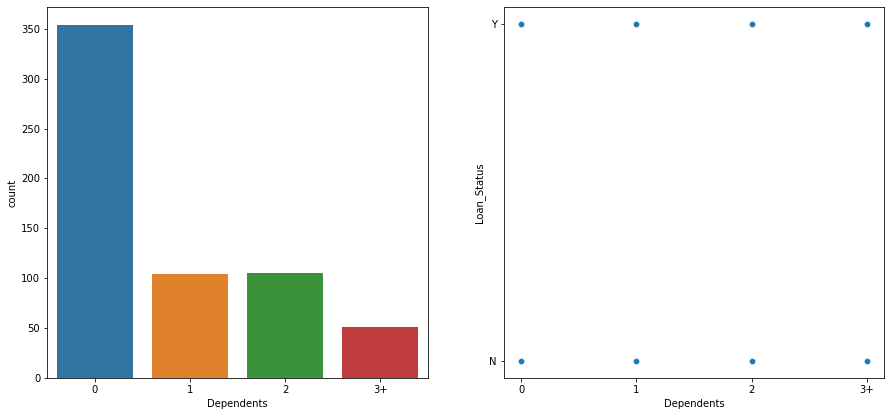

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Dependents'])
plt.xlabel('Dependents')
plt.subplot(222)
sns.scatterplot(x= 'Dependents', y= 'Loan_Status', data= loan)
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Dependents we conclude that msot people applying for loan have 0 Dependents from countplot and from scatterplot we conclude that every category of Dependents are present in both categories of loan_status.

5. Education

In [27]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

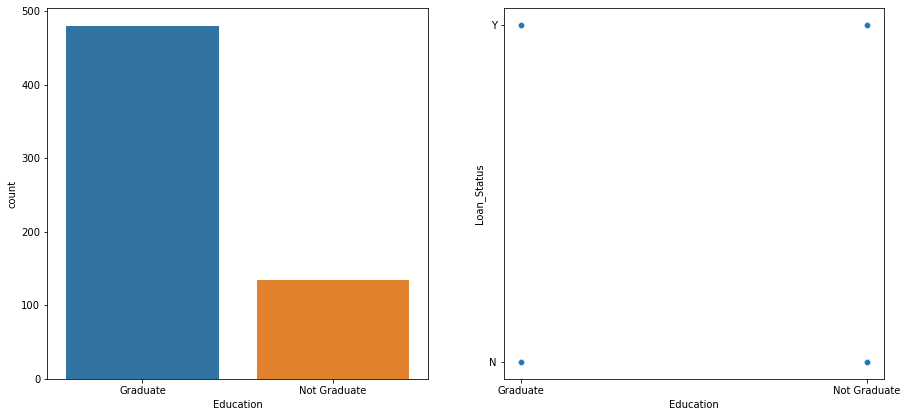

In [28]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Education'])
plt.xlabel('Education')
plt.subplot(222)
sns.scatterplot(x= 'Education', y= 'Loan_Status', data= loan)
plt.xlabel('Education')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Education we conclude that most people applying for loan are graduates from countplot and from scatterplot we conclude that both categories of Education are present in both categories of Loan_Status.

6. Self Employed.

In [29]:
loan['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

filling null values randomly to not to create bias.

In [30]:
loan['Self_Employed'].fillna(method= 'bfill', inplace= True)

In [31]:
loan['Self_Employed'].isnull().sum()

0

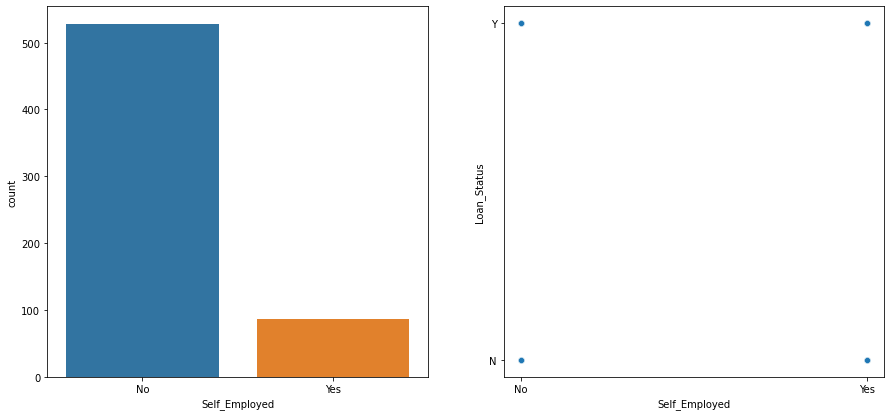

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Self_Employed'])
plt.xlabel('Self_Employed')
plt.subplot(222)
sns.scatterplot(x= 'Self_Employed', y= 'Loan_Status', data= loan)
plt.xlabel('Self_Employed')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Self_Employed we conclude that msot people applying for loan are not self employed from countplot and from scatterplot we conclude that both categories of Self_Employed are present in both categories of loan_status.

7. ApplicantIncome

In [33]:
loan['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

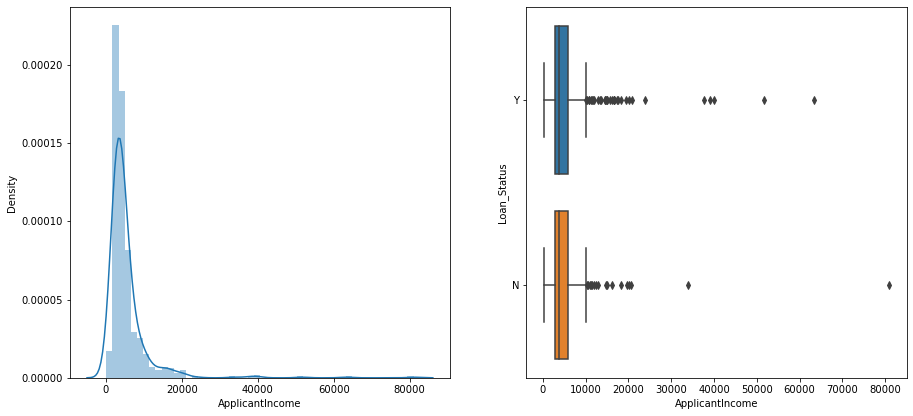

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(loan['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.subplot(222)
sns.boxplot(x= 'ApplicantIncome', y= 'Loan_Status', data= loan)
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of ApplicantIncome we conclude that data is positively skewed with data having highest density around 1500 from distplot and from boxplot we conclude that outliers of applicantincome are present in both categories of loan_status.

8. CoapplicantIncome

In [35]:
loan['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

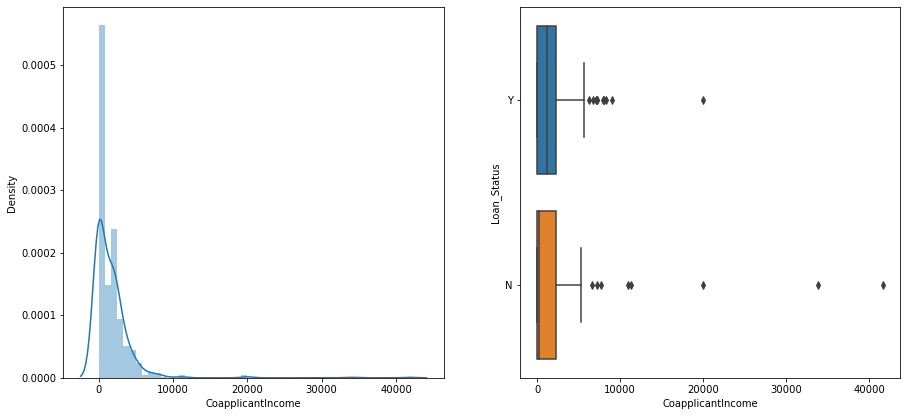

In [36]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(loan['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')
plt.subplot(222)
sns.boxplot(x= 'CoapplicantIncome', y= 'Loan_Status', data= loan)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of CoapplicantIncome we conclude that data is positively skewed with data having highest density around 500 from distplot and from boxplot we conclude that outliers are present in both categories of loan_status.

9. LoanAmount

In [37]:
loan['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

filling null values randomly to not to create bias.

In [38]:
loan['LoanAmount'].fillna(method= 'bfill', inplace= True)

In [39]:
loan['LoanAmount'].isnull().sum()

0

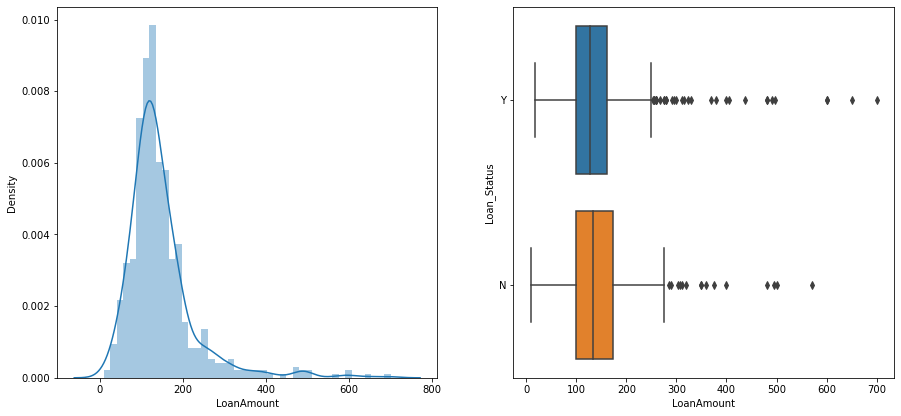

In [40]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(loan['LoanAmount'])
plt.xlabel('LoanAmount')
plt.subplot(222)
sns.boxplot(x= 'LoanAmount', y= 'Loan_Status', data= loan)
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of LoanAmount we conclude that data is positively skewed with having highest density around 100 from distplot and from boxplot we conclude that outliers are present in both categories of Loan_Status.

10. LoanAmountTerm

In [41]:
loan['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

filling null values randomly to not to create bias.

In [42]:
loan['Loan_Amount_Term'].fillna(method= 'bfill', inplace= True)

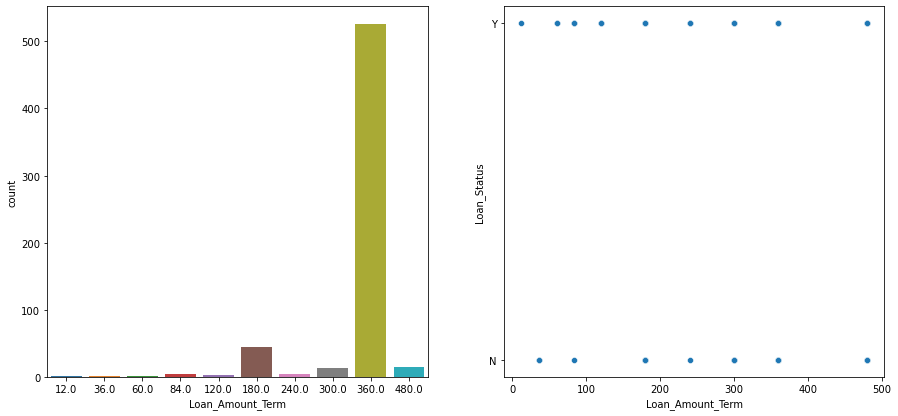

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Loan_Amount_Term'])
plt.xlabel('Loan_Amount_Term')
plt.subplot(222)
sns.scatterplot(x= 'Loan_Amount_Term', y= 'Loan_Status', data= loan)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Loan_Amount_Term we conclude that most people have taken loan for period of 360 months from countplot and from scatterplot we conclude that in every range of Loan_amount_term both categories of loan_status are present.

11. Credit_History

In [45]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

filling null values randomly to not to create bias

In [46]:
loan['Credit_History'].fillna(method= 'bfill', inplace= True)

In [47]:
loan['Credit_History'].isnull().sum()

0

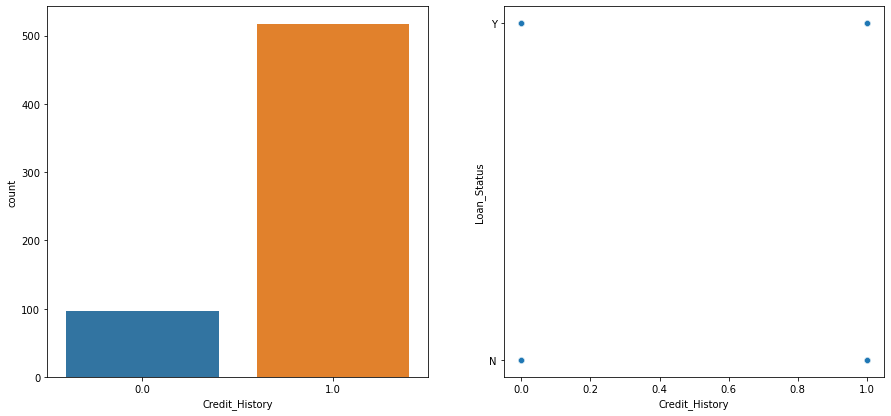

In [48]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Credit_History'])
plt.xlabel('Credit_History')
plt.subplot(222)
sns.scatterplot(x= 'Credit_History', y= 'Loan_Status', data= loan)
plt.xlabel('Credit_History')
plt.ylabel('Loan_Status')
plt.show()

By looking at both graphs of Credit_History we conclude that most people applying for loan have credit history as 1 from countplot and from scatterplot we conclude that both categories credit_history are present in both categories of loan_status.

12. Porperty_Area

In [49]:
loan['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

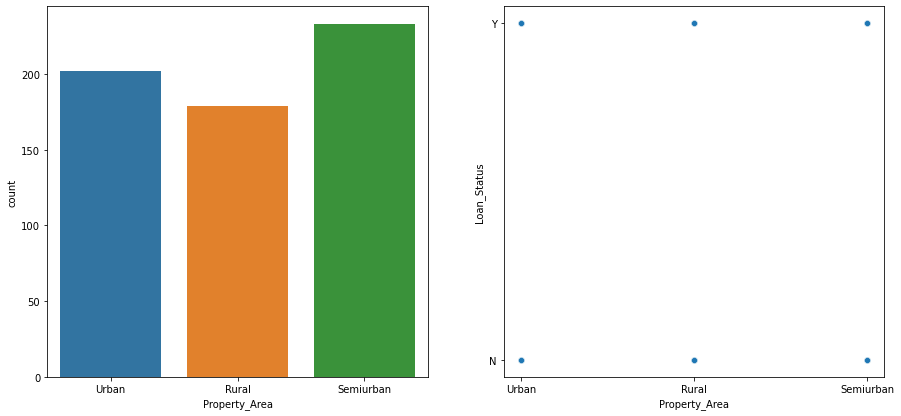

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(loan['Property_Area'])
plt.xlabel('Property_Area')
plt.subplot(222)
sns.scatterplot(x= 'Property_Area', y= 'Loan_Status', data= loan)
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.show()

By lookinga at both graphs of property_area we conclude that most people applying for loan lives in semi urban area from countplot and from scatterplot we conclude that every category of Property_Area is present in both categories of Loan_Status.

#### Now changing the data types of every column to int or float data type.

In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [52]:
loan['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
loan['Gender'] = loan['Gender'].replace(['Male','Female'],[0,1])

In [54]:
loan['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
loan['Married'] = loan['Married'].replace(['No','Yes'],[0,1])

In [56]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [57]:
loan['Dependents'] = loan['Dependents'].replace(['0', '1', '2', '3+'],[0,1,2,3])

In [58]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [59]:
loan['Education'] = loan['Education'].replace(['Graduate', 'Not Graduate'],[0,1])

In [60]:
loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [61]:
loan['Self_Employed'] = loan['Self_Employed'].replace(['No','Yes'],[0,1])

In [62]:
loan['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [63]:
loan['Property_Area'] = loan['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'],[0,1,2])

#### Now checking for multicollinearity using heatmap.

In [64]:
loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [65]:
loan['Loan_Status'] = loan['Loan_Status'].replace(['Y','N'],[1,0])

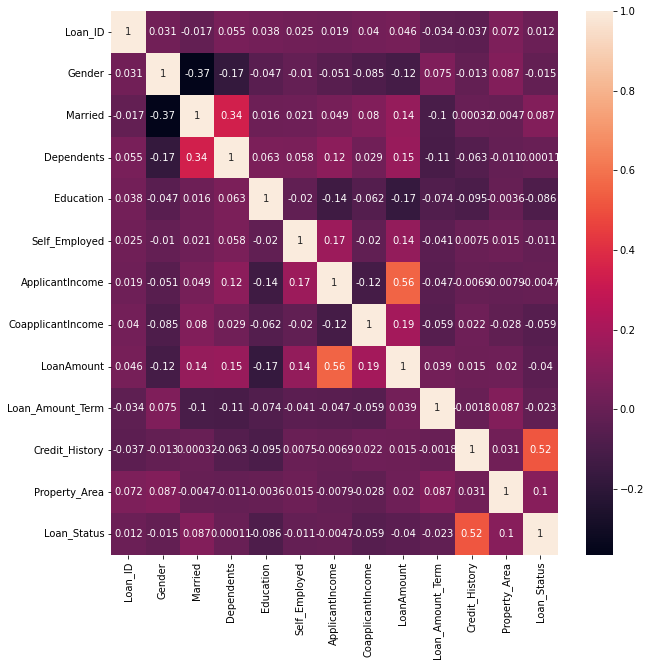

In [66]:
plt.figure(figsize= [10,10])
sns.heatmap(loan.corr(), annot= True)
plt.show()

Loan_Status is having high positive correlation with Credit_History and Property_Area columns. Apart from that no other column is having high positive or negative correlation with Loan_Status. We need to drop some columns to make data more refine.

In [67]:
loan.drop(['Gender','Dependents','Education','ApplicantIncome','LoanAmount'], axis= 1, inplace= True)

In [68]:
loan['Loan_Status'] = loan['Loan_Status'].replace([0,1],['N','Y'])

In [70]:
X = loan.drop(['Loan_Status'], axis= 1)
y = loan['Loan_Status']

#### Now applying various models to find most suitable model for thsi dataset

1. Random Forest Classification Model

In [71]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [73]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [74]:
print('train score : ', rff.score(scaledX_train, y_train))
print('test score : ', rff.score(scaledX_test, y_test))

train score :  0.824847250509165
test score :  0.7154471544715447


In [75]:
rff.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

2. Bagging Classification Model

In [79]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
bcf = GridSearchCV(bc, param_grid= {'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)
bcf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [80]:
print('train score : ', bcf.score(scaledX_train, y_train))
print('test score : ', bcf.score(scaledX_test, y_test))

train score :  0.7067209775967414
test score :  0.6097560975609756


In [81]:
bcf.best_params_

{'max_features': 5, 'max_samples': 4}

3. Logistic Regression Model

In [82]:
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [83]:
print('train score : ', lrf.score(scaledX_train, y_train))
print('test score : ', lrf.score(scaledX_test, y_test))

train score :  0.824847250509165
test score :  0.7317073170731707


In [84]:
lrf.best_params_

{'C': 1}

4. Decision Tree classification model

In [85]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [86]:
print('train score : ', dtf.score(scaledX_train, y_train))
print('test score : ', dtf.score(scaledX_test, y_test))

train score :  0.824847250509165
test score :  0.7154471544715447


In [87]:
dtf.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

#### Out of all the models The logistic Regression model is performing best on this dataset. So we will use it.

In [88]:
lr = LogisticRegression(C= 1)

In [89]:
pred = lr.fit(scaledX_train, y_train).predict(scaledX_test)

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})
df.head()

,Actual,Prediction
253,Y,Y
506,Y,Y
365,N,Y
265,Y,Y
260,Y,Y


#### Now Checking performance of the model by using various metrices on it.

In [91]:
print('accuracy score : ', metrics.accuracy_score(y_test, pred))

accuracy score :  0.7317073170731707


In [92]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

confusion matrix : 


array([[20, 28],
       [ 5, 70]], dtype=int64)

#### From the above metrics score we can conclude that model is performing quite well on dataset. So now we need to save it.

In [94]:
save_c = pickle.dumps(lr)

#### Hence the task has been completed.